# IntilaQ - Data Science Academy
Instructor: Mohamed Karim Bouaziz (DATASCAI)

### Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

### Data visualisation

In [18]:
# import data
data= np.loadtxt('AI101.txt', delimiter=',')


In [20]:
# visualise data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [21]:
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = data[:,1].reshape(97,1)


Text(0,0.5,'profil in 10.000')

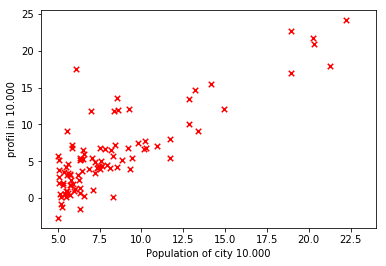

In [22]:
plt.scatter(x[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel("Population of city 10.000")
plt.ylabel(u'profil in 10.000')

### Python Native Non Vectorized

**Linear regression hypothesis** $$ \widehat{y} = h_{\theta}(x) = \theta_{0}+\theta_{1}x$$
**Cost function** $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^{2} $$

In [31]:
def computeCostNonVectorised(X, y, theta0,theta1):
    m= y.size
    J=0
    y_hat= theta0 + theta1* X
    J= np.sum(np.square(y_hat-y))/(2*m)
    
    return(J)

In [ ]:
predictions = X * theta;
    sqrErrors = (predictions-y).^2;

    J = 1/(2*m) * sum(sqrErrors);

**Partial derivative** 
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}) $$
$$ \frac{\partial J(\theta)}{\partial\theta_{1}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x^{(i)} $$
**Gradient Descent** 
$$ \theta_{0} = \theta_{0} -\alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}) $$
$$ \theta_{1} = \theta_{1} -\alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x^{(i)} $$

In [32]:
def gradientDescentNonVectorised(X, y,  theta0,theta1, alpha=0.01, num_iters=1500):
    m= y.size
    J_history=np.zeros(num_iters)
    for i in range(num_iters):
        y_hat= theta0 + theta1* X
    #theta_1 = theta(1) - alpha * (1/m) * sum((X*theta-y).*X(:,1));
    #theta_2 = theta(2) - alpha * (1/m) * sum((X*theta-y).*X(:,2));
        theta0= theta0 - alpha * np.sum(y_hat-y)/m
        theta1= theta1 - alpha * np.sum(y_hat-y)/m
        J_history= computeCostNonVectorised(X, y, theta0, theta1)
    
    
    return(theta0,theta1, J_history)

In [33]:
# theta for minimized cost J
theta0_nv=0.0
theta1_nv=0.0
X_ = data[:,0].reshape(97,1)
theta0_nv,theta1_nv , cost_J_nv = gradientDescentNonVectorised(X=X_, y=y,theta0=theta0_nv,theta1=theta1_nv)
print(u"Python Native Non Vectorised: \u03980 = %s ; \u03981 = %s" % (theta0_nv,theta1_nv))
print(u"Correct result: \u03980 = -3.6302914394 ; \u03981 = 1.16636235034")

Python Native Non Vectorised: Θ0 = 0.637474077114 ; Θ1 = 0.637474077114
Correct result: Θ0 = -3.6302914394 ; Θ1 = 1.16636235034


### Python Native Vectorized

**Linear regression hypothesis** $$ \widehat{y} = h_{\theta}(X) = \theta^{T}X$$
**Cost function** $$ J(\theta) = \frac{1}{2m} \sum (h_{\theta}(X)-y)^{2} $$

In [ ]:
def computeCost(X, y, theta):
    #
    return(J)

**Partial derivative** $$ \frac{\partial J(\theta)}{\partial\theta} = \frac{1}{m} X^T(h_\theta(X)-y)$$
**Gradient Descent** $$ \theta = \theta -\alpha \frac{1}{m} X^T(h_\theta(X)-y)$$

In [ ]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    #
    return(theta, J_history)

In [ ]:
# theta for minimized cost J
theta_v=np.zeros((X.shape[1],1)) # X.shape[1] = 2 (theta0, theta1)
theta_v , cost_J_v = gradientDescent(X, y,theta=theta_v)
print(u"Python Native Vectorised: \u03980 = %s ; \u03981 = %s" % (theta_v[0],theta_v[1]))
print(u"Correct result: \u03980 = [-3.63029144] ; \u03981 = [ 1.16636235]")

### Benchmark

In [ ]:
x0 = np.arange(5,23)

### Python Native Non Vectorised
y0 = theta0_nv+theta1_nv*x0
print(u"Python Native Non Vectorised: \u03980 = %s ; \u03981 = %s" % (theta0_nv,theta1_nv))

### Python Native Vectorised
y1 = theta_v[0]+theta_v[1]*x0
print(u"Python Native Vectorised: \u03980 = %s ; \u03981 = %s" % (theta_v[0],theta_v[1]))

## Plot
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
# Plot Python Native Non Vectorised
plt.plot(x0,y0, label='Linear regression (Native Non Vectorised)')
# Plot Python Native Vectorised
plt.plot(x0,y1, label='Linear regression (Native Vectorised)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel(u'Profit in €10,000s')
plt.legend(loc=4);

### Plot result Cost function  $J(\theta_0,\theta_1)$

In [ ]:
x_cost=range(1500)
plt.plot(x_cost, cost_J_nv, label='Linear regression (Native Non Vectorised)')
plt.plot(x_cost, cost_J_v, label='Linear regression (Native Vectorised)')
plt.legend(loc=1);